<a href="https://colab.research.google.com/github/mo-9/boston/blob/main/boston_house_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021-07-18 15:38:09.185442: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-18 15:38:11.559 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


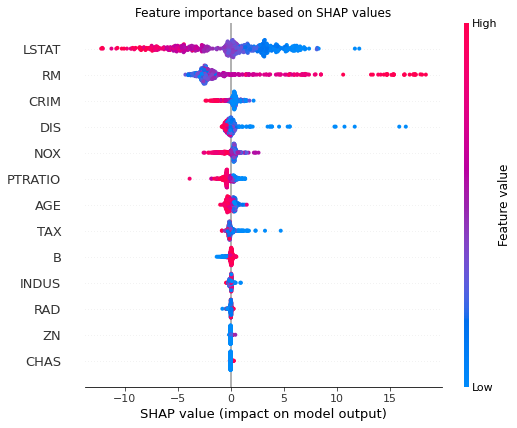

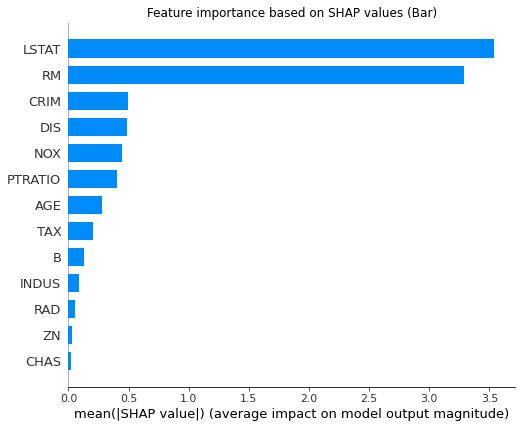

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<Figure size 432x288 with 0 Axes>

In [ ]:
import streamlit as st
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

st.write("""
# Boston House Price Prediction App
This app predicts the **Boston House Price**!
""")
st.write('---')

# Loads the Boston House Price Dataset
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.DataFrame(boston.target, columns=["MEDV"])

# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

def user_input_features():
    CRIM = st.sidebar.slider('CRIM', X.CRIM.min(), X.CRIM.max(), X.CRIM.mean())
    ZN = st.sidebar.slider('ZN', X.ZN.min(), X.ZN.max(), X.ZN.mean())
    INDUS = st.sidebar.slider('INDUS', X.INDUS.min(), X.INDUS.max(), X.INDUS.mean())
    CHAS = st.sidebar.slider('CHAS', X.CHAS.min(), X.CHAS.max(), X.CHAS.mean())
    NOX = st.sidebar.slider('NOX', X.NOX.min(), X.NOX.max(), X.NOX.mean())
    RM = st.sidebar.slider('RM', X.RM.min(), X.RM.max(), X.RM.mean())
    AGE = st.sidebar.slider('AGE', X.AGE.min(), X.AGE.max(), X.AGE.mean())
    DIS = st.sidebar.slider('DIS', X.DIS.min(), X.DIS.max(), X.DIS.mean())
    RAD = st.sidebar.slider('RAD', X.RAD.min(), X.RAD.max(), X.RAD.mean())
    TAX = st.sidebar.slider('TAX', X.TAX.min(), X.TAX.max(), X.TAX.mean())
    PTRATIO = st.sidebar.slider('PTRATIO', X.PTRATIO.min(), X.PTRATIO.max(), X.PTRATIO.mean())
    B = st.sidebar.slider('B', X.B.min(), X.B.max(), X.B.mean())
    LSTAT = st.sidebar.slider('LSTAT', X.LSTAT.min(), X.LSTAT.max(), X.LSTAT.mean())
    data = {'CRIM': CRIM,
            'ZN': ZN,
            'INDUS': INDUS,
            'CHAS': CHAS,
            'NOX': NOX,
            'RM': RM,
            'AGE': AGE,
            'DIS': DIS,
            'RAD': RAD,
            'TAX': TAX,
            'PTRATIO': PTRATIO,
            'B': B,
            'LSTAT': LSTAT}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Main Panel

# Print specified input parameters
st.header('Specified Input parameters')
st.write(df)
st.write('---')

# Build Regression Model
model = RandomForestRegressor()
model.fit(X, Y)
# Apply Model to Make Prediction
prediction = model.predict(df)

st.header('Prediction of MEDV')
st.write(prediction)
st.write('---')

# Explaining the model's predictions using SHAP values
# https://github.com/slundberg/shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

st.header('Feature Importance')
plt.title('Feature importance based on SHAP values')
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')
st.write('---')

plt.title('Feature importance based on SHAP values (Bar)')
shap.summary_plot(shap_values, X, plot_type="bar")
st.pyplot(bbox_inches='tight')